In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Caricamento del dataset
df = pd.read_csv('train.csv')

# 2. Ispezione rapida
print("--- Prime 5 righe del dataset ---")
print(df.head())





In [ ]:
print("\n--- Informazioni sul dataset ---")
print(df.info())


--- Informazioni sul dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64

In [ ]:
object_df = df.select_dtypes(include=[np.object_])
object_df.nunique()

gender               3
ethnicity            5
education_level      4
income_level         5
smoking_status       3
employment_status    4
dtype: int64

In [ ]:
unique_values = object_df.apply(lambda x: x.unique())
print(unique_values)

gender                                         [Female, Male, Other]
ethnicity                     [Hispanic, White, Asian, Black, Other]
education_level      [Highschool, Graduate, Postgraduate, No formal]
income_level         [Lower-Middle, Upper-Middle, Low, Middle, High]
smoking_status                              [Current, Never, Former]
employment_status           [Employed, Retired, Student, Unemployed]
dtype: object


In [ ]:
income_level_to_value = {'Lower-Middle' : 2, 'Upper-Middle':4, 'Low': 1, 'Middle':3, 'High':5}
df['income_level'] = df['income_level'].map(income_level_to_value)
df = pd.get_dummies(df, drop_first=True)

In [ ]:
# Visualizza tutte le colonne solo all'interno di questo blocco
with pd.option_context('display.max_columns', None):
    display(df.head())

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,income_level,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes,gender_Male,gender_Other,ethnicity_Black,ethnicity_Hispanic,ethnicity_Other,ethnicity_White,education_level_Highschool,education_level_No formal,education_level_Postgraduate,smoking_status_Former,smoking_status_Never,employment_status_Retired,employment_status_Student,employment_status_Unemployed
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,62,199,58,114,102,2,0,0,0,1.0,False,False,False,True,False,False,True,False,False,False,False,False,False,False
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,71,199,50,121,124,4,0,0,0,1.0,False,False,False,False,False,True,True,False,False,False,True,False,False,False
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,73,188,59,114,108,2,0,0,0,0.0,True,False,False,True,False,False,True,False,False,False,True,True,False,False
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,74,182,54,85,123,2,0,1,0,1.0,False,False,False,False,False,True,True,False,False,False,False,False,False,False
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,85,206,49,131,124,4,0,1,0,1.0,True,False,False,False,False,True,True,False,False,False,True,True,False,False


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,700000.0,349999.500000,202072.738554,0.00,174999.75,349999.50,524999.25,699999.00
age,700000.0,50.359734,11.655520,19.00,42.00,50.00,58.00,89.00
alcohol_consumption_per_week,700000.0,2.072411,1.048189,1.00,1.00,2.00,3.00,9.00
physical_activity_minutes_per_week,700000.0,80.230803,51.195071,1.00,49.00,71.00,96.00,747.00
diet_score,700000.0,5.963695,1.463336,0.10,5.00,6.00,7.00,9.90
sleep_hours_per_day,700000.0,7.002200,0.901907,3.10,6.40,7.00,7.60,9.90
screen_time_hours_per_day,700000.0,6.012733,2.022707,0.60,4.60,6.00,7.40,16.50
bmi,700000.0,25.874684,2.860705,15.10,23.90,25.90,27.80,38.40
waist_to_hip_ratio,700000.0,0.858766,0.037980,0.68,0.83,0.86,0.88,1.05
systolic_bp,700000.0,116.294193,11.010390,91.00,108.00,116.00,124.00,163.00


## Osservazioni

### Colonna Target

- **media** :0.62. A differenza della realtà abbiamo tanti casi di diabete. Ma aspetta, la colonna diabete sono solo 0 e 1 (lo ha e non lo ha) oppure 0,1,2? Perché a seconda di questo cambia il modo in cui valutare la media

In [ ]:
df["diagnosed_diabetes"].unique()

array([1., 0.])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 35 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

Quindi non ci troviamo davanti a un dataset sbilanciato con un caso di diabete ogni x sani, ma quasi uno ogni due

Siccome il dataset è bilanciato sul target non devo fare operazioni per bilanciarlo artificalmente o usare strumenti tipo stratified kfold / creare righe duplicate etc...


### Guardiamo adesso i minimi e massimi delle nostre colonne

A livello di minimi massimi da tenere d'occhio non c'è nulla di significativo

### Dispersione

Ci sono valori di deviazione standard molto elevati?

No la devazione standard non ha livelli allarmanti su alcuna colonna

### Mediana

Ci sono feature con mediana tanto differente dalla media?

physical_activity_minutes_per_week	media = 80.230803	mediana = 71.00	

#### FARE APPROFONDIMENTO SU physical_activity_minutes_per_week

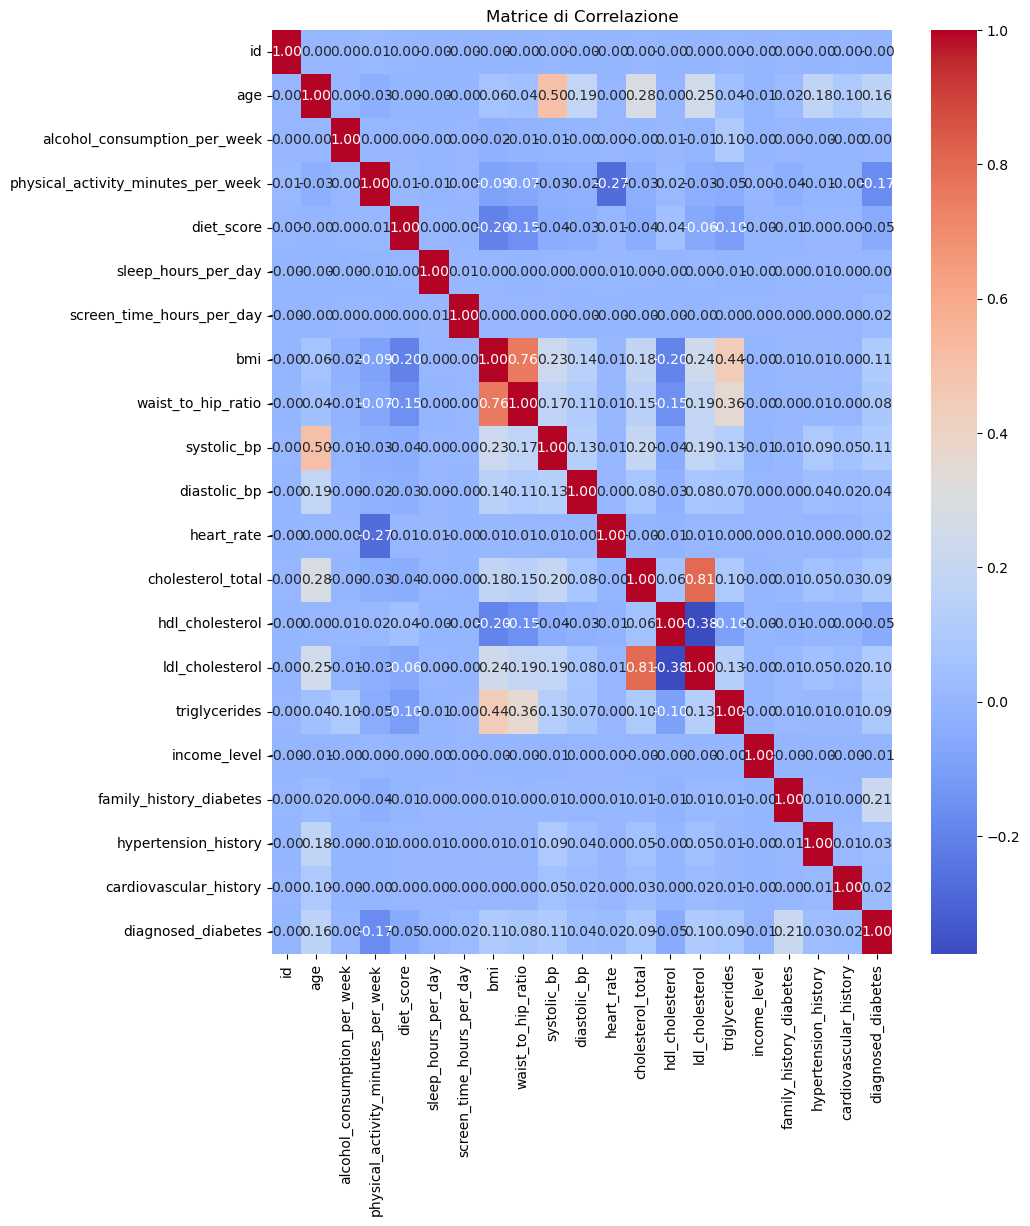

In [ ]:
# 3. Visualizzazione delle Correlazioni
# Selezioniamo solo le colonne numeriche per la matrice di correlazione
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 12))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice di Correlazione')
plt.show()

## Correlazione

**family history diabetes** 0.21

**phisical activiy** -0.17

**age** 0.16

bmi

systolic.bp

ldl cholesterol

family history diabetes

### Correlate a phisical activity

heart-rate -0.27

### Correalte a Age

hypertantion and cardiovascular history

ldl cholesterol

cholesterol total

distolic bp

sistolic bp

# FEATURE ENG



### 1. Indicatori di Insulino-Resistenza e Rischio Lipidico (Fondamentali)

Il profilo lipidico standard (Totale, HDL, LDL, Trigliceridi) è utile, ma nel diabete di tipo 2 la "dislipidemia diabetica" è specifica. Ecco cosa calcolare:

* **Rapporto Trigliceridi / HDL ($TG/HDL Ratio$)**
    * **Formula:** $\frac{\text{triglycerides}}{\text{hdl\_cholesterol}}$
    * **Significato medico:** È uno dei più potenti marker surrogati dell'**insulino-resistenza**. Un valore elevato (generalmente $> 2.5$ o $3.0$ se in mg/dL) è fortemente correlato a particelle LDL piccole e dense (più pericolose) e iperinsulinemia, anche prima che il diabete venga diagnosticato.
* **Colesterolo Non-HDL**
    * **Formula:** $\text{cholesterol\_total} - \text{hdl\_cholesterol}$
    * **Significato medico:** Le linee guida attuali per il diabete lo considerano un target terapeutico secondario cruciale. Rappresenta tutto il colesterolo "cattivo" (LDL + VLDL + IDL). È spesso un predittore di rischio cardiovascolare migliore dell'LDL da solo nei pazienti diabetici.
* **Rapporto Colesterolo Totale / HDL (Castelli Risk Index I)**
    * **Formula:** $\frac{\text{cholesterol\_total}}{\text{hdl\_cholesterol}}$
    * **Significato medico:** Valuta il rischio cardiovascolare globale. Nel diabetico, vogliamo mantenere questo rapporto il più basso possibile ($< 3.5$ idealmente).

### 2. Indicatori Emodinamici (Pressione Sanguigna)

L'ipertensione e il diabete viaggiano spesso insieme.

* **Pressione Differenziale (Pulse Pressure - PP)**
    * **Formula:** $\text{systolic\_bp} - \text{diastolic\_bp}$
    * **Significato medico:** Indica la rigidità arteriosa. Nel diabete, le arterie tendono a indurirsi prima. Una PP ampia ($> 60$ mmHg) è un fattore di rischio indipendente per eventi cardiaci e danni ai reni (nefropatia diabetica).
* **Pressione Arteriosa Media (MAP)**
    * **Formula:** $\text{diastolic\_bp} + \frac{1}{3}(\text{systolic\_bp} - \text{diastolic\_bp})$
    * **Significato medico:** Indica la pressione di perfusione degli organi vitali. È utile per valutare il carico cronico sul sistema vascolare.

### 3. Indicatori di Stile di Vita e Obesità Viscerale

Oltre al BMI (che non distingue tra muscolo e grasso) e al `waist_to_hip_ratio` (già presente e ottimo), possiamo combinare i fattori comportamentali.

* **Indice di Sedentarietà Relativa**
    * **Formula:** $\frac{\text{screen\_time\_hours\_per\_day} \times 7}{\text{physical\_activity\_minutes\_per\_week} / 60}$
    * *Nota:* Stiamo convertendo tutto in ore settimanali per avere un rapporto adimensionale o comparabile.
    * **Significato medico:** Il diabete è fortemente legato non solo alla mancanza di attività, ma al tempo trascorso seduti. Un alto rapporto indica un fenotipo ad alto rischio metabolico.
* **Interaction Term: BMI $\times$ Età**
    * **Significato medico:** L'impatto del BMI sul rischio di diabete cambia con l'età. Un BMI alto in giovane età è molto più predittivo per lo sviluppo precoce del diabete rispetto a un BMI alto in età avanzata. Creare questa variabile di interazione può aiutare i modelli di machine learning a catturare questa sfumatura.

### 4. Score di Sindrome Metabolica (Proxy)

Poiché hai quasi tutti i componenti della Sindrome Metabolica (tranne la glicemia a digiuno, ma hai l'outcome), puoi creare un punteggio di rischio (0-4) sommando le seguenti condizioni booleane (soglie basate su criteri ATP III / IDF):

1.  **Obesità addominale:** `waist_to_hip_ratio` $> 0.90$ (uomini) o $> 0.85$ (donne) [o usare BMI $> 30$ se WHR non è standardizzato].
2.  **Trigliceridi alti:** `triglycerides` $\ge 150$ mg/dL.
3.  **HDL basso:** `hdl_cholesterol` $< 40$ (uomini) o $< 50$ (donne).
4.  **Pressione alta:** `systolic_bp` $\ge 130$ oppure `diastolic_bp` $\ge 85$ (oppure `hypertension_history` == 1).

**Perché calcolarlo?** Più alto è questo punteggio, esponenzialmente più alto è il rischio di conversione in diabete franco o complicazioni.

### Riassunto per il tuo codice (Python/Pandas):

Se vuoi implementare subito i più impattanti, ecco come trasformerei il DataFrame:

1.  `TG_HDL_Ratio` (Trigliceridi / HDL) -> **Top Priority**
2.  `Non_HDL_Cholesterol` (Totale - HDL)
3.  `Pulse_Pressure` (Sistolica - Diastolica)
4.  `Metabolic_Syndrome_Score` (Somma dei fattori di rischio sopra citati)


In [ ]:

df_eng = df.copy()

# ==========================================================================
# 0. GESTIONE SESSO (Logica One-Hot)
# ==========================================================================
# Definiamo le maschere booleane per identificare i gruppi.

# 1. Identifichiamo gli UOMINI
is_male = df_eng['gender_Male'] == 1

# 2. Identifichiamo "ALTRO" (Solo se la colonna esiste!)
if 'gender_Other' in df_eng.columns:
    is_other = df_eng['gender_Other'] == 1
else:
    # Se non c'è la colonna, assumiamo False per tutti (nessun "Other" rilevato)
    is_other = pd.Series(False, index=df_eng.index)
    # Nota: Se avevi 'Other' nel dataset originale e l'hai persa col get_dummies,
    # qui verranno trattati come Donne.

# 3. Identifichiamo le DONNE
# Sono coloro che NON sono uomini E NON sono altro
is_female = (~is_male) & (~is_other)

# ==========================================================================
# 1. INDICATORI LIPIDICI (Invariati)
# ==========================================================================
epsilon = 1e-6
df_eng['tg_hdl_ratio'] = df_eng['triglycerides'] / (df_eng['hdl_cholesterol'] + epsilon)
df_eng['non_hdl_cholesterol'] = df_eng['cholesterol_total'] - df_eng['hdl_cholesterol']
df_eng['castelli_risk_index_1'] = df_eng['cholesterol_total'] / (df_eng['hdl_cholesterol'] + epsilon)

# ==========================================================================
# 2. INDICATORI EMODINAMICI (Invariati)
# ==========================================================================
df_eng['pulse_pressure'] = df_eng['systolic_bp'] - df_eng['diastolic_bp']
df_eng['mean_arterial_pressure'] = df_eng['diastolic_bp'] + (df_eng['pulse_pressure'] / 3)

# ==========================================================================
# 3. STILE DI VITA (Invariati)
# ==========================================================================
activity_hours = df_eng['physical_activity_minutes_per_week'] / 60
screen_time_week = df_eng['screen_time_hours_per_day'] * 7
df_eng['sedentary_index'] = screen_time_week / (activity_hours + epsilon)
df_eng['bmi_age_interaction'] = df_eng['bmi'] * df_eng['age']

# ==========================================================================
# 4. SCORE SINDROME METABOLICA (ADATTATO CON NP.SELECT)
# ==========================================================================

# Usiamo np.select per applicare le soglie condizionali in base alle maschere create sopra.
# Ordine condizioni: [Se è Maschio, Se è Donna, (Default/Other)]
# Nota: Se is_other è tutto False, il ramo 'default' non verrà mai attivato se copriamo M e F.
# Quindi strutturiamo: [Maschio, Femmina], default=Other

conditions = [is_male, is_female]

# --- A. Obesità Addominale (WHR) ---
# Uomo > 0.90, Donna > 0.85, Altro = 0.875
whr_thresholds = [0.90, 0.85]
limit_whr = np.select(conditions, whr_thresholds, default=0.875)

df_eng['bool_abdominal_obesity'] = (df_eng['waist_to_hip_ratio'] > limit_whr).astype(int)

# --- B. Trigliceridi Alti ---
# >= 150 per tutti
df_eng['bool_high_triglycerides'] = (df_eng['triglycerides'] >= 150).astype(int)

# --- C. HDL Basso ---
# Uomo < 40, Donna < 50, Altro < 45
hdl_thresholds = [40, 50]
limit_hdl = np.select(conditions, hdl_thresholds, default=45)

df_eng['bool_low_hdl'] = (df_eng['hdl_cholesterol'] < limit_hdl).astype(int)

# --- D. Pressione Alta ---
# >= 130/85 (Uguale per tutti)
df_eng['bool_high_bp'] = (
    (df_eng['systolic_bp'] >= 130) | 
    (df_eng['diastolic_bp'] >= 85) | 
    (df_eng['hypertension_history'] == 1)
).astype(int)

# --- Calcolo Score ---
df_eng['metabolic_syndrome_score'] = (
    df_eng['bool_abdominal_obesity'] + 
    df_eng['bool_high_triglycerides'] + 
    df_eng['bool_low_hdl'] + 
    df_eng['bool_high_bp']
)


In [ ]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 47 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

In [ ]:
# ==========================================================================
# 5. INDICATORI DI STRESS CARDIACO E CARICO
# ==========================================================================
# Rate Pressure Product (RPP) o Doppio Prodotto
# Formula: Frequenza Cardiaca * Pressione Sistolica
# Significato: È un indice del consumo di ossigeno del miocardio.
# Nei diabetici, un RPP alto a riposo indica un sistema nervoso simpatico iperattivo.
df_eng['rate_pressure_product'] = df_eng['heart_rate'] * df_eng['systolic_bp']

# Logaritmo dei Trigliceridi
# Significato: I trigliceridi hanno spesso una distribuzione asimmetrica (skewed).
# Il rischio cardiovascolare scala logaritmicamente, non linearmente.
df_eng['log_triglycerides'] = np.log(df_eng['triglycerides'] + 1)

# ==========================================================================
# 6. INDICATORI DI FORMA FISICA COMPLESSA (Proxy Viscerale)
# ==========================================================================
# Poiché non abbiamo la circonferenza vita assoluta (in cm) ma solo il rapporto (WHR),
# e abbiamo il BMI, possiamo creare un termine di interazione.
# Significato: Distingue un BMI alto dovuto a muscoli (WHR basso) 
# da un BMI alto dovuto a grasso viscerale (WHR alto).
df_eng['visceral_adiposity_proxy'] = df_eng['bmi'] * df_eng['waist_to_hip_ratio']

# ==========================================================================
# 7. CURVA DEL SONNO (Relazione a U)
# ==========================================================================
# Il rischio diabete rispetto al sonno non è lineare. Dormire poco fa male, 
# ma dormire troppo fa altrettanto male (spesso indice di depressione o apnea).
# Creiamo la distanza dall'ottimale (7.5 ore).
# Più alto è il valore, peggiore è la condizione.
df_eng['sleep_deviation'] = (df_eng['sleep_hours_per_day'] - 7.5).abs()

# ==========================================================================
# 8. SCORE DI CARICO STORICO/COMORBIDITÀ
# ==========================================================================
# Somma semplice dei fattori di rischio storici/genetici.
# Rappresenta il "carico allostatico" o la fragilità del paziente.
df_eng['comorbidity_burden'] = (
    df_eng['family_history_diabetes'] + 
    df_eng['hypertension_history'] + 
    df_eng['cardiovascular_history']
)

# ==========================================================================
# 9. RAPPORTO DI RISCHIO COMPLETO (Lipidico-Emodinamico)
# ==========================================================================
# Un tentativo di creare un super-feature che combini stress vascolare e metabolico.
# (Sistolica * Trigliceridi) / HDL
# Questo amplifica i pazienti con "Tempesta Metabolica" (Pressione alta + Grassi alti + HDL basso)
df_eng['metabolic_stress_index'] = (
    (df_eng['systolic_bp'] * df_eng['triglycerides']) / (df_eng['hdl_cholesterol'] + epsilon)
)

In [ ]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 53 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

In [ ]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from optuna.integration import LightGBMPruningCallback
import numpy as np

# --- 1. MODIFICA CRUCIALE: Usiamo solo una frazione dei dati ---
# Per la demo usiamo solo il 100% dei dati.
# Questo rende tutto 10 volte più veloce istantaneamente.
df_demo = df_eng.sample(frac=1, random_state=42)

X = df_demo.drop(columns=["diagnosed_diabetes"], axis=1)
y = df_demo["diagnosed_diabetes"]

# Ottimizzazione Memoria
for col in X.select_dtypes(include=['float64']).columns:
    X[col] = X[col].astype('float32')

# Split train/val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

def objective(trial):
    params = {
        # --- Config Hardware ---
        'device_type': 'gpu',
        'gpu_platform_id': 0,
        'gpu_device_id': 0,
        'n_jobs': -1, 
        'verbose': -1,
        
        # --- Config VELOCITÀ ESTREMA ---
        'max_bin': 15,          # Default 255. A 15 è velocissimo (ma perde precisione).
        'bagging_freq': 1,      # Ricampiona i dati ad ogni iterazione
        'bagging_fraction': 0.8,# Usa solo il 80% dei dati per ogni albero (più veloce)
        
        # --- Parametri Modello ---
        'objective': 'binary',
        'metric': 'auc', 
        'boosting_type': 'gbdt',
        
        # --- Search Space (Ridotto per convergere prima) ---
        'n_estimators': 1000, # Abbassato il tetto massimo
        'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.3, log=True), # LR più alto = impara prima
        'num_leaves': trial.suggest_int('num_leaves', 20, 100), # Meno foglie = alberi più semplici
        'max_depth': trial.suggest_int('max_depth', 3, 8),      # Alberi meno profondi
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 100, 1000),
        
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0, log=True),
    }

    model = lgb.LGBMClassifier(**params)
    
    # Callback Pruning
    pruning_callback = LightGBMPruningCallback(trial, "auc")
    
    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric='auc',
        callbacks=[
            # Smetti subito se non migliori per 10 round (molto aggressivo)
            lgb.early_stopping(stopping_rounds=10, verbose=False),
            pruning_callback
        ]
    )
    
    preds = model.predict(X_val)
    accuracy = np.mean(preds == y_val)
    
    return accuracy

# --- Studio ---
print("--- Inizio Demo Rapida (Hyperband + 10% Dati) ---")

# HyperbandPruner è perfetto per le demo: prova tanti parametri all'inizio con poche risorse
# e uccide spietatamente quelli che non promettono bene.
study = optuna.create_study(
    direction='maximize', 
    study_name="Demo_Class_LGBM",
    pruner=optuna.pruners.HyperbandPruner(min_resource=1, max_resource='auto', reduction_factor=3)
)

# 30 tentativi dovrebbero finire in 1-3 minuti con queste impostazioni
study.optimize(objective, n_trials=30, show_progress_bar=True)

print(f"\nMiglior Accuratezza (sul sample ridotto): {study.best_value:.4f}")
print("Migliori Parametri:", study.best_params)

[I 2025-12-05 16:46:48,492] A new study created in memory with name: Demo_Class_LGBM


--- Inizio Demo Rapida (Hyperband + 10% Dati) ---


  0%|          | 0/30 [00:00<?, ?it/s]

[W 2025-12-05 16:46:50,192] Trial 0 failed with parameters: {'learning_rate': 0.0773709929982061, 'num_leaves': 86, 'max_depth': 8, 'min_data_in_leaf': 462, 'reg_alpha': 0.15840369272089866, 'reg_lambda': 4.135984172365174} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\mbagn\anaconda3\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\mbagn\AppData\Local\Temp\ipykernel_35472\2076509230.py", line 57, in objective
    model.fit(
  File "c:\Users\mbagn\anaconda3\Lib\site-packages\lightgbm\sklearn.py", line 1560, in fit
    super().fit(
  File "c:\Users\mbagn\anaconda3\Lib\site-packages\lightgbm\sklearn.py", line 1049, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\mbagn\anaconda3\Lib\site-packages\lightgbm\engine.py", line 322, in train
    booster.update(fobj=fobj)
  File "c:\Users\mbagn\anaconda3

KeyboardInterrupt: 

Addestramento modello finale con parametri: {'device_type': 'gpu', 'gpu_platform_id': 0, 'gpu_device_id': 0, 'objective': 'binary', 'metric': 'auc', 'n_jobs': -1, 'verbose': -1, 'random_state': 42, 'learning_rate': 0.12263562535055612, 'num_leaves': 62, 'max_depth': 6, 'min_data_in_leaf': 787, 'reg_alpha': 0.038838111460427406, 'reg_lambda': 0.004052859236609128}

--- Report Finale ---
Accuratezza sul Test Set: 0.6720

Dettagli per classe:
              precision    recall  f1-score   support

         0.0       0.60      0.39      0.47     52739
         1.0       0.70      0.84      0.76     87261

    accuracy                           0.67    140000
   macro avg       0.65      0.62      0.62    140000
weighted avg       0.66      0.67      0.65    140000



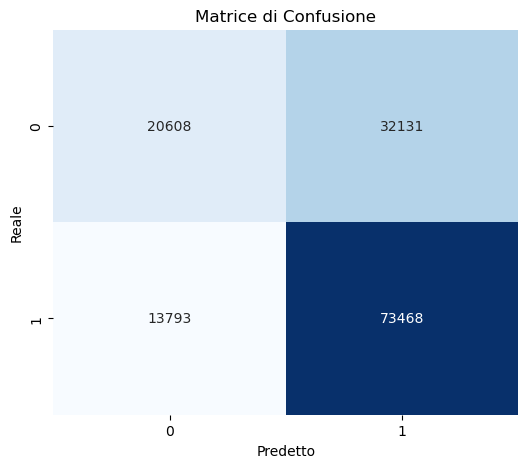

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Recuperiamo i parametri migliori trovati da Optuna
best_params = study.best_params

# 2. Aggiungiamo i parametri "fissi" (GPU, obiettivo, ecc.) che non abbiamo ottimizzato
fixed_params = {
    'device_type': 'gpu',
    'gpu_platform_id': 0,
    'gpu_device_id': 0,
    'objective': 'binary',
    'metric': 'auc',
    'n_jobs': -1,
    'verbose': -1,
    'random_state': 42
}

# Uniamo i due dizionari (i parametri fissi + i migliori trovati)
final_params = {**fixed_params, **best_params}

print(f"Addestramento modello finale con parametri: {final_params}")

# 3. Addestramento Finale
final_model = lgb.LGBMClassifier(**final_params)
final_model.fit(X_train, y_train)

# 4. Valutazione
y_pred = final_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"\n--- Report Finale ---")
print(f"Accuratezza sul Test Set: {acc:.4f}")
print("\nDettagli per classe:")
print(classification_report(y_test, y_pred))

# 5. Grafico Matrice di Confusione (Ottimo per le presentazioni)
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice di Confusione')
plt.xlabel('Predetto')
plt.ylabel('Reale')
plt.show()